## Nash equilibrium matrix

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [194]:
nash_array = np.zeros((11,11))

In [196]:
t_max = 10**3
R = 10
P = 5

In [198]:
eps = 1e-1
for row in range(11):
    for col in range(11):
        t = 0
        S = 10 - row
        T = 5 + col
        x_0 = 0.5
        period = []
        period.append(x_0)
        
        while t < t_max:
            p_a = x_0*R + (1 - x_0)*S
            p_b = x_0*T + (1 - x_0)*P
            x_1 = x_0*(1 - x_0)*(p_a - p_b) + x_0

            period.append(x_1)

            if t >= 2:
                diff = period[t] - period[t-2]
                if diff <= eps:
                    nash_array[row,col] = (period[t] + period[t-1])/2     

            if x_1 <= eps:
                print('total D at time:', t, S,T)
                nash_array[row,col] = 0
                break
            elif x_1 >= 1 - eps:
                print('total C at time:', t,S,T)
                nash_array[row,col] = 1
                break
            elif abs(p_a - p_b) <= eps:
                print('0 increment at time:',t,S,T)
                nash_array[row,col] = x_1
                break
                
            x_0 = x_1
            t += 1


total C at time: 0 10 5
total C at time: 0 10 6
total C at time: 0 10 7
total C at time: 0 10 8
total C at time: 0 10 9
total C at time: 0 10 10
total C at time: 0 10 11
0 increment at time: 3 10 12
0 increment at time: 14 10 13
0 increment at time: 0 10 15
total C at time: 0 9 5
total C at time: 0 9 6
total C at time: 0 9 7
total C at time: 0 9 8
total C at time: 0 9 9
total C at time: 0 9 10
0 increment at time: 3 9 11
0 increment at time: 2 9 12
0 increment at time: 5 9 13
0 increment at time: 0 9 14
total C at time: 0 8 5
total C at time: 0 8 6
total C at time: 0 8 7
total C at time: 0 8 8
total C at time: 0 8 9
total C at time: 1 8 10
0 increment at time: 1 8 11
0 increment at time: 2 8 12
0 increment at time: 0 8 13
0 increment at time: 5 8 14
0 increment at time: 14 8 15
total C at time: 0 7 5
total C at time: 0 7 6
total C at time: 0 7 7
total C at time: 0 7 8
total C at time: 1 7 9
total C at time: 3 7 10
0 increment at time: 2 7 11
0 increment at time: 0 7 12
0 increment at t

In [200]:
def plot_matrix(matrix):
    plt.figure(figsize=(6, 5))
    cmap = LinearSegmentedColormap.from_list("red_blue", ["red", "blue"])
    plt.imshow(matrix, extent=[5, 15, 0, 10], aspect='auto', cmap = cmap, vmin = 0, vmax = 1)
    plt.xlabel("T")
    plt.ylabel("S")
    plt.colorbar(label="Value")
    plt.tight_layout()
    plt.show()

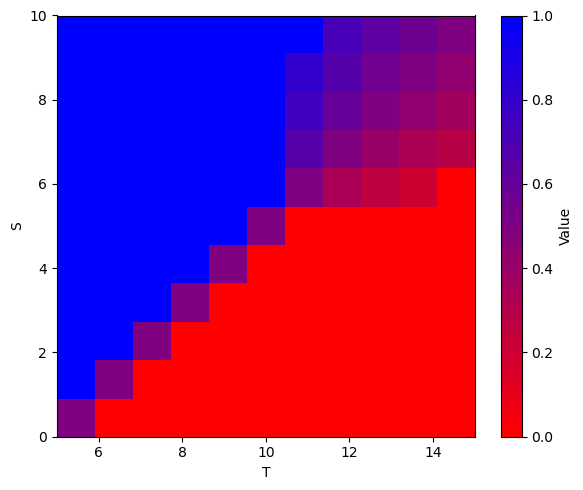

In [202]:
plot_matrix(nash_array)